一、项目背景

本数据报告以淘宝app平台为数据集，通过行业的指标对淘宝用户行为进行分析，从而探索淘宝用户的行为模式，具体指标包括：日PV和日UV分析，付费率分析，复购行为分析，漏斗流失分析和用户价值RFM分析。

二、提出问题

1.日PV有多少
2.日UV有多少
3.付费率情况如何
4.复购率是多少
5漏斗流失情况如何
6.用户价值情况

四、理解数据

本数据集共有104万条左右数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共计6列字段，列字段分别是：
user_id：用户身份，脱敏
item_id：商品ID，脱敏
behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
user_geohash：地理位置
item_category：品类ID（商品所属的品类）
time：用户行为发生的时间

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datalab/72423/淘宝用户行为.csv")
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [3]:
missingTotal = df.isnull().sum()
missingExist = missingTotal[missingTotal>0]
missingExist = missingExist.sort_values(ascending=False)
missingExist

user_geohash    8334824
dtype: int64

In [4]:
#将time列拆分为date列和hour列
df["date"] = df["time"].str.split(" ").str[0]
df["hour"] = df["time"].str.split(" ").str[1]
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [5]:
# 将time列和date列转化为日期类数据类型，将hour列转化为整数类型
df["time"] = pd.to_datetime(df["time"])
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["hour"].astype("int")
df.dtypes
# 查看各列的数据类型

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [6]:
df = df.sort_values(by="time") #排序处理
df = df.reset_index(drop=True) #建立新索引
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [7]:
df.describe()

,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。
UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

Text(0.5,1,'uv_daily')

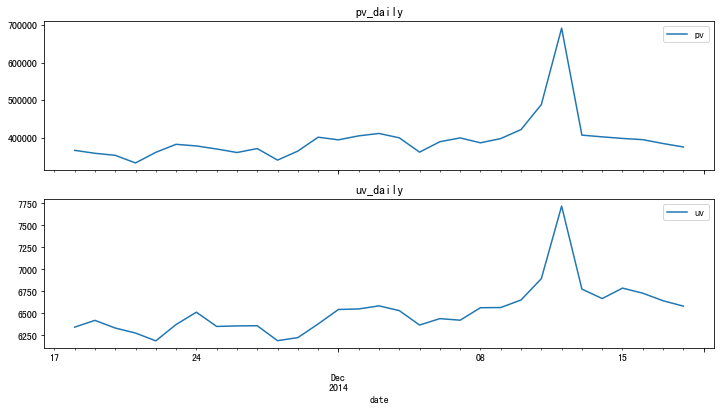

In [8]:
pv_daily = df.groupby("date")["user_id"].count().reset_index(drop=False).rename(columns={"user_id":"pv"})
uv_daily = df.groupby("date")["user_id"].apply(lambda x:x.drop_duplicates().count())
uv_daily = uv_daily.reset_index(drop=False).rename(columns={"user_id":"uv"})
fig,axes = plt.subplots(2,1,figsize=(12,6),sharex=True)
pv_daily.plot(x="date",y="pv",ax=axes[0])
uv_daily.plot(x="date",y="uv",ax=axes[1])
axes[0].set_title("pv_daily")
axes[1].set_title("uv_daily")

结果显示如上图所示，在双十二期间，pv和uv访问量达到峰值

In [9]:
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


Text(0.5,1,'uv_hour')

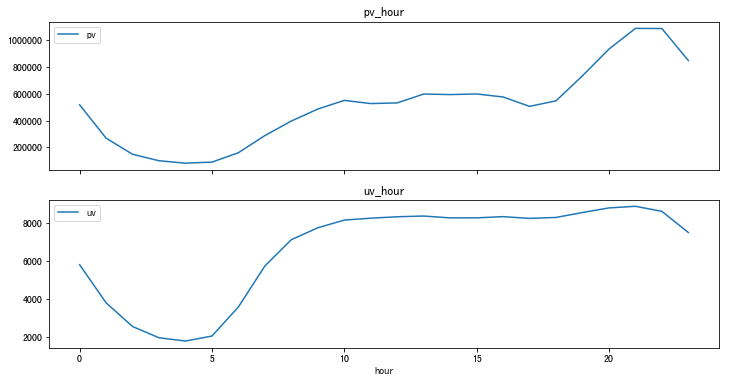

In [10]:
#小时访问量分析
pv_hour = df.groupby("hour")["user_id"].count().reset_index().rename(columns={"user_id":"pv"})
uv_hour = df.groupby("hour")["user_id"].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={"user_id":"uv"})
fig,axes = plt.subplots(2,1,figsize=(12,6),sharex=True)
pv_hour.plot(x="hour",y="pv",ax=axes[0])
uv_hour.plot(x="hour",y="uv",ax=axes[1])
axes[0].set_title("pv_hour")
axes[1].set_title("uv_hour")

图表显示:pv和uv在凌晨0-5点期间波动情况相同，都呈下降趋势，访问量都比较小，同时在晚上18：00左右，pv波动情况比较剧烈，相比来看uv不太明显，因此晚上18：00以后是淘宝用户访问app的活跃时间段。

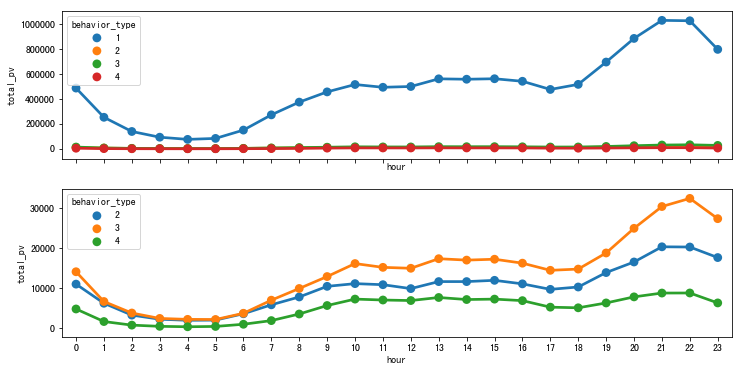

In [11]:
#不同行为类型用户pv分析
pv_detail = df.groupby(["behavior_type","hour"])["user_id"].count().reset_index().rename(columns={"user_id":"total_pv"})
fig,axes = plt.subplots(2,1,figsize=(12,6),sharex=True)
sns.pointplot(x="hour",y="total_pv",hue="behavior_type",data=pv_detail,ax=axes[0])
sns.pointplot(x="hour",y="total_pv",hue="behavior_type",data=pv_detail[pv_detail.behavior_type != 1],ax=axes[1])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'user_buy')

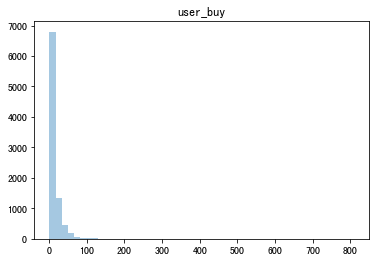

In [12]:
#用户购买次数情况分析
user_buy = df[df.behavior_type == 4].groupby("user_id")["behavior_type"].count().rename(columns={"behavior_type":"buy_time"})
sns.distplot(user_buy,kde=False)
plt.title('user_buy')
# user_buy

图表显示：淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体。

日ARPPU分析

ARPPU（average revenue per paying user）是指从每位付费用户身上获得的收入，它反映的是每个付费用户的平均付费额度。
ARPPU=总收入/活跃用户付费数量。
因为本数据集中没有消费金额，因此在计算过程中用消费次数代替消费金额。
人均消费次数=消费总次数/消费人数

Text(0.5,1,'daily_arppu')

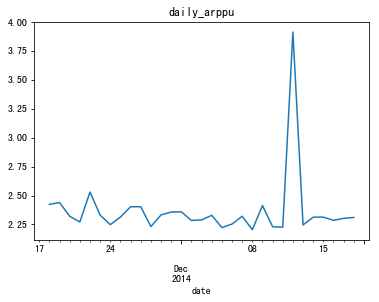

In [13]:
arppu = df[df.behavior_type == 4].groupby(["date","user_id"])["behavior_type"].count().reset_index().rename(columns={"behavior_type":"total"})
arppu.groupby("date").apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title("daily_arppu")

图表显示：平均每天消费次数在2.25-2.5次之间波动，双十二期间消费次数达到最高值，日ARPPU将近4次。

日ARPU分析

ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。
活跃用户数平均消费次数=消费总次数/活跃用户人数(每天有操作行为的为活跃)。

Text(0.5,1,'daily_ARPU')

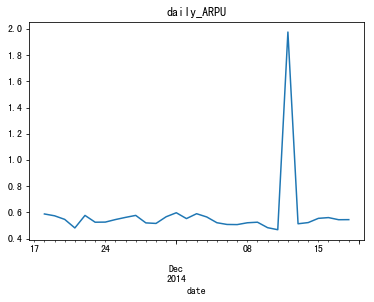

In [15]:
df["operation"] = 1
user_buy2 = df.groupby(["date","user_id","behavior_type"])["operation"].count().reset_index().rename(columns={"operation":"total"})
user_buy2.groupby("date").apply(lambda x:x[x.behavior_type==4].total.sum()/len(x.user_id.unique())).plot()
plt.title('daily_ARPU')

图表显示，淘宝活跃用户平均每天消费次数比较低，在0.4~0.6次上下浮动，双十二期间达到最高值，有2次左右。

Text(0.5,1,'daily_afford_rate')

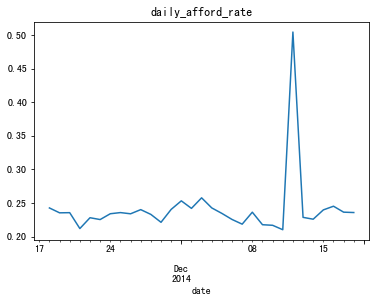

In [16]:
# 付费率分析
# 付费率=消费人数/活跃用户人数
user_buy2.groupby("date").apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot()
plt.title('daily_afford_rate')

图表显示：每天活跃用户人群中，大概有20%~25%的用户具有消费行为，在双十二期间付费率达到最高。

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


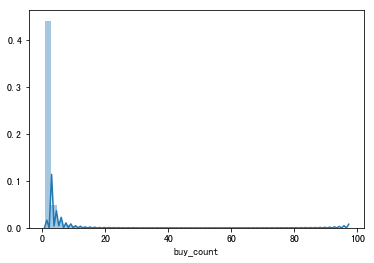

In [17]:
user_buy3 = df[df.behavior_type==4].groupby(["user_id","date","hour"])["operation"].sum().rename("buy_count")
sns.distplot(user_buy3,kde=True)
# user_buy3.mode()

In [18]:
# 复购情况分析
# 复购情况，即两天以上有购买行为,一天多次购买算一次。
# 复购率=有复购行为的用户数/有购买行为的用户总数。

date_rebuy = df[df.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename("date_rebuy")
date_rebuy[date_rebuy>=2].count()/date_rebuy.count()

0.87170830519918974

Text(0,0.5,'gap_count')

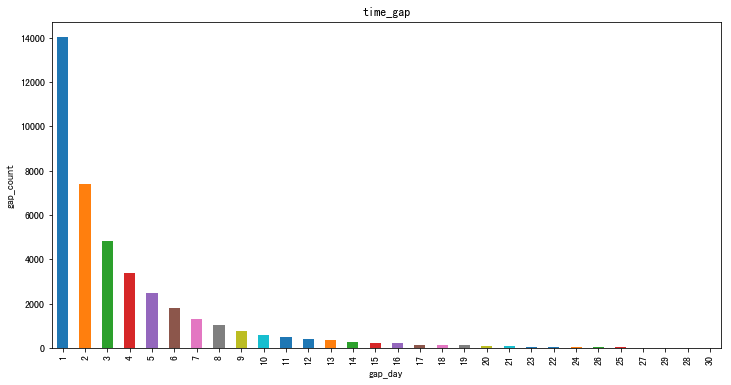

In [19]:
#所有复购时间间隔消费次数分布

rebuy_day = df[df.behavior_type == 4].groupby(["user_id","date"])["operation"].count().reset_index()
user_buy4 = rebuy_day.groupby('user_id')["date"].apply(lambda x:x.sort_values().diff(1).dropna())
user_buy4 = user_buy4.map(lambda x:x.days)
plt.figure(figsize=(12,6))
user_buy4.value_counts().plot(kind="bar")
plt.title("time_gap")
plt.xlabel("gap_day")
plt.ylabel("gap_count")

多数用户复购率为0.8717。由图表可知，在1-10天之内复购次数比较多，10天之后复购次数淘宝用户很少在进行复购，因此需要重视10天之内的淘宝用户复购行为，增加用户复购。

In [31]:
# 漏斗流失分析

a = df.groupby(["behavior_type"]).count().reset_index()
a

,behavior_type,user_id,item_id,user_geohash,item_category,time,date,hour,operation
0,1,11550581,11550581,3704666,11550581,11550581,11550581,11550581,11550581
1,2,242556,242556,74365,242556,242556,242556,242556,242556
2,3,343564,343564,104443,343564,343564,343564,343564,343564
3,4,120205,120205,38608,120205,120205,120205,120205,120205


In [36]:
b = df["user_id"].count()
b

12256906

可得总浏览量：12256906  总点击量：11550581   收藏量：242556  加入购物车量：343564  购买量：120205

In [53]:
print("浏览量——点击量转化率：{:.4f}\n点击量——收藏量转化率：{:.4f}\n点击量——加入购物量转化率：{:.4f}\n点击量——购买量转化率：{:.4f}".format(a.iloc[0,1]/b
                                                                             ,a.iloc[1,1]/a.iloc[0,1]
                                                                             ,a.iloc[2,1]/a.iloc[0,1]
                                                                             ,a.iloc[3,1]/a.iloc[0,1]))

浏览量——点击量转化率：0.9424
点击量——收藏量转化率：0.0210
点击量——加入购物量转化率：0.0297
点击量——购买量转化率：0.0104


In [22]:
# 用户行为与商品种类关系分析
data_category = df[df.behavior_type != 2].groupby(["item_category","behavior_type"]).operation.count().unstack(1).fillna(0).rename(columns={1:"点击量",3:"加入购物车",4:"购买量"})
data_category.head()

behavior_type,点击量,加入购物车,购买量
item_category,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0


In [23]:
data_category["转化率"] = data_category["购买量"]/data_category["点击量"]
data_category.head()

behavior_type,点击量,加入购物车,购买量,转化率
item_category,,,,
2,3.0,0.0,0.0,0.000000
3,3.0,0.0,0.0,0.000000
4,1.0,0.0,0.0,0.000000
6,10.0,0.0,0.0,0.000000
8,976.0,4.0,4.0,0.004098


In [24]:
data_category = data_category.fillna(0)
data_category = data_category[data_category.转化率<=1]

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


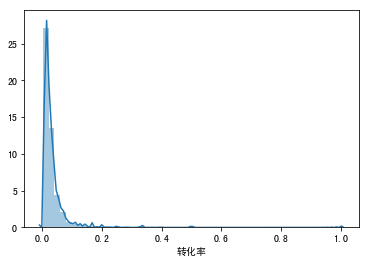

In [25]:
sns.distplot(data_category[data_category['转化率']>0]['转化率'])

图表可知，基本上各种用户行为类型转换率都在0.1以内,同时绝大多数用户都没有购买情况

用户价值度RFM模型分析

RFM的含义：
R（Recency）：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则表示客户交易发生的日期越近。
F（Frequency）：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
M（Monetary）：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
RFM分析就是根据客户活跃程度和交易金额的贡献，进行客户价值细分的一种方法。

In [26]:
from datetime import datetime
datenow=datetime(2014,12,20)
#每位用户最近购买时间
recent_buy_time = df[df.behavior_type==4].groupby('user_id').date.apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})
recent_buy_time.recent = recent_buy_time.recent.map(lambda x:x.days)
#每个用户消费频率
buy_freq = df[df.behavior_type==4].groupby('user_id').date.count().reset_index().rename(columns={'date':'freq'})
rfm = pd.merge(recent_buy_time,buy_freq,left_on='user_id',right_on='user_id',how='outer')
#将各维度分成两个程度,分数越高越好
rfm['recent_value']=pd.qcut(rfm.recent,2,labels=['2','1'])
rfm['freq_value']=pd.qcut(rfm.freq,2,labels=['1','2'])
rfm['rfm']=rfm['recent_value'].str.cat(rfm['freq_value'])
rfm.head()

,user_id,recent,freq,recent_value,freq_value,rfm
0,4913,4,6,2,1,21
1,6118,3,1,2,1,21
2,7528,7,6,1,1,11
3,7591,7,21,1,2,12
4,12645,6,8,2,1,21


表格显示：因为本数据集没有提供消费金额，因此只能R和F进行用户价值分析，通过RF用户价值分析，对于22用户，为重点用户需要关注；对于21这类忠诚度高而购买能力不足的，可以可以适当给点折扣或捆绑销售来增加用户的购买频率。对于12这类忠诚度不高而购买能力强的，需要关注他们的购物习性做精准化营销。